<a href="https://colab.research.google.com/github/j1ayizhao/datascienceA2/blob/main/Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

elpd_loo is an estimate of the predictive performance of a model on new data, which is used to compare models from different function families. Without another model to compare to, elpd_loo is virtually useless.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is when the model focuses too closely on the training dataset and fails to reflect reality, and fails to generalize new and unseen data. It happens when the model learns the data it is based on too well, and fails to understand true relationships in the data

**Task3**:

How do we mitigate overfitting?

weakly informative, or regularizing priors  (used to impose constraints on the parameters of a model by discouraging overly complex parameter values) do a lot to prevent overfitting. when we aren't confident about our causal model, selecting a model with the smallest number of variables keeps our model from being distracted by unnecessary information

**Task4**:

How do we mitigate underfitting?

We can mitigate underfitting by seeing which model has the best elpd_loo value

Another way to mitigate underfitting is to improve the complexity of your model, like shifting from a linear to non-linear model so it can reveal more patterns in your data. Reducing regularization also prevents underfitting, as regularization simplifies networks to prevent overfitting

answer from: https://allcloud.io/blog/how-to-solve-underfitting-and-overfitting-data-models/


**Task5**:

Why would we want more than one predictor in a model?

Having more than one predictor helps improve the accuracy. Many real world phennomena are influenced by multiple factors, and adding predictors allows the model to account for these factors and interactions, leading to better predictions. For example, if you're trying to predict house prices, having predictors like location, square footage, and age will provide more accuracy than if you just used one.

**Task6**:

Can we have too many predictors? How would we now?

We would know when we have too many predictors because it can lead to overfitting. If our model fits the training dataset really well but doesn't match our understanding of the underlying relationships, we can tell that it is overfitted.

**Task7**:

What is variable selection, and how does it work?

Variable selection means to choose among a long list of variables and only including the most relevant/appropriate ones in your model. It's helpful to make a causal diagram first to lay out in your head how you think each variable causes one another. Then run models with all the combinations of likely variables and use arviz plot compare to see which ones have the lowest elpd_loo

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.



*   model 1: the model treats the two predictors independently and doesn't assume any interaction between them. it produces the same slope for all categories in the categorical variable
*   model 2: the categorical variable is assumed to have a hierarchical effect on the other predictor variable, so the slopes can vary across different categories

*   model 3: explicitly includes the interaction between the categorical variable and continuous variable





**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

Multiple linear regression models are used to visualize the relationship between a dependent variable and multiple independent variables. To visualize them, we can use the Matplotlib library to create a 3D plot. Otherwise, if the model is within a 2D space, we can't visualize it all at once

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

!pip install git+https://github.com/pydata/xarray.git

import xarray as xr
!pip install bambi


import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-fxjtrc1f
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-fxjtrc1f
  Resolved https://github.com/pydata/xarray.git to commit 6bea71572120c0eef2e4bf8d269d32b17a39dc35
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [3]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [4]:
ft_pos_cat = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [5]:
ft_pos_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 12 divergences after tuning. Increase `target_accept` or reparameterize.


In [6]:
ft_pos_int = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [7]:
ft_pos_3pt_int = bmb.Model("`FGp` ~ FTp + Pos + `3PA` + FTp:Pos + FTp:`3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [8]:
ft_pos_3pt_int2 = bmb.Model("`FGp` ~ `FTp` + Pos + `3PA` + Pos:`3PA`", data=bb).fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

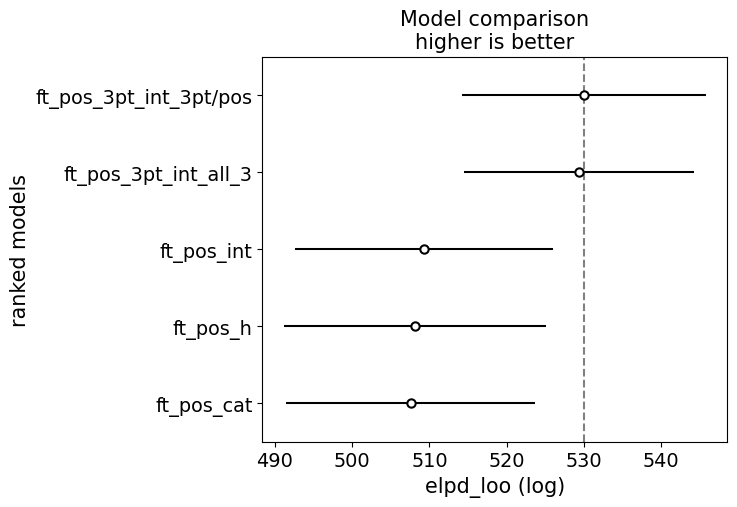

In [10]:
compare = az.compare({"ft_pos_cat":ft_pos_cat, "ft_pos_h":ft_pos_h, "ft_pos_int":ft_pos_int, "ft_pos_3pt_int_all_3":ft_pos_3pt_int, "ft_pos_3pt_int_3pt/pos":ft_pos_3pt_int2})
az.plot_compare(compare)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

I think the two models with three point attempts are better compared to the other three. This could be because players who attempt to shoot three-pointers are more skilled at shooting in general, Because players who are more confident in their abilities are more likely to attempt to shoot three points